# Loading libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the data

In [3]:
file_path = r'C:\Users\ALEV PC\Desktop\Project\Data\Raw data\df_final_web_data_pt_1.txt'
df = pd.read_csv(file_path)
df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [4]:
print(df.isnull().sum())  


client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [5]:
process_step_counts = df['process_step'].value_counts()
print(process_step_counts)

process_step
start      108910
step_1      73432
step_2      61768
step_3      53628
confirm     45403
Name: count, dtype: int64


# Data cleaning

In [7]:
df.drop_duplicates(inplace=True)
df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


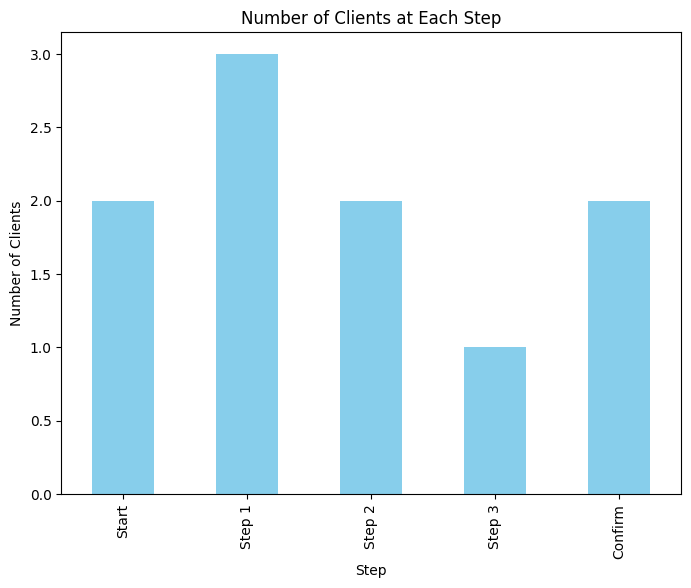

In [9]:
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df['step_number'] = df['process_step'].map(step_mapping)

# Count occurrences of each step
step_counts = df['step_number'].value_counts().sort_index()

# Plotting the chart
plt.figure(figsize=(8, 6))
step_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Clients at Each Step')
plt.xlabel('Step')
plt.ylabel('Number of Clients')
plt.xticks(range(len(step_counts)), ['Start', 'Step 1', 'Step 2', 'Step 3', 'Confirm'])
plt.show()